# Στοχαστικές Ανελίξεις 
## 6η εργαστηριακή Άσκηση

Όνομα: Μάριος Παπαχρήστου

ΑΜ: 03115101

email : papachristoumarios@gmail.com


In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)  # increase default figure size

np.random.seed(2016)  # for reproducibility

In [9]:
%matplotlib inline

In [2]:
def Ising(spins_init, Temp, nsteps=None, previews=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        if previews and n in previews:
            plt.figure()
            plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
            plt.title('Number of steps: {}'.format(n))
            plt.show()
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
    
    return spins

## Παραδοτέα

α) Δοκιμάστε να τρέξετε τον κώδικα με όλα τα spin αρχικά στο +1. 
Τρέξτε τον μερικές φορές. Αλλάζουν τα ποιοτικά χαρακτηριστικά 
της διαμόρφωσης που επιστρέφει ο αλγόριθμος;

β) Αρχίστε τώρα να κατεβάζετε τη θερμοκρασία, θέτοντας διαδοχικά 
T = 30, 10, 5, 2, 1.5, 1., 0.5, 0.1, 0.01. Δείξτε για κάθε θερμοκρασία την εικόνα που πήρατε.

Η μαγνήτιση του συστήματος ορίζεται ως ο μέσος όρος των σπιν του πλέγματος Λ, δηλαδή

$$ m(\sigma) = \frac{1}{|\Lambda|} \sum_{k \in \Lambda} \sigma(k) $$

γ) Εξετάστε πώς συμπεριφέρεται η $m(\sigma)$ για τις καταστάσεις $\sigma$ 
που δίνει ο αλγόριθμος καθώς κατεβάζετε τη θερμοκρασία, όπως στο ερώτημα (β).
Δείξτε μια γραφική παράσταση της $m(\sigma)$ ως προς τη θερμοκρασία (για τη διαμόρφωση $\sigma$ που προσομοιώσατε).

δ) Για τη θερμοκρασία `T = 0.1` αλλάξτε την τιμή της παραμέτρου nsteps. Πώς μοιάζουν τα ενδιάμεσα στάδια από τα οποία περνάει η αλυσίδα μέχρι να καταλήξουμε στην εικόνα που πήραμε για `nsteps = 800 × L × L`; Δείξτε τις εικόνες που πήρατε για 
`nsteps=10,20,50,100,200,400,800  × L × L`

α) Παρατηρούμε ότι τα ποιοτικά χαρακτηριστικά της διαμόρφωσης δεν αλλάζουν και είναι ανεξάρτητα του σπιν διότι για μεγάλο αριθμό βημάτων προσεγγίζουμε την αναλλοίωτη κατανομή π που είναι ανεξάρτητη της αρχικής κατανομής των σπινς. 

Iteration No 1


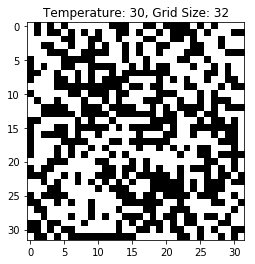

Iteration No 2


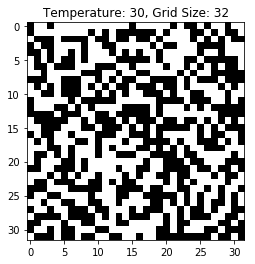

Iteration No 3


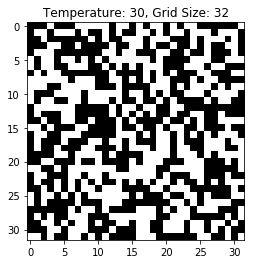

In [22]:
L = 32
spins_init = np.ones((L,L), dtype=int)
for i in range(3):
    print('Iteration No', i + 1)
    spins = Ising(spins_init, Temp=30)
    plt.figure()
    plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: 30, Grid Size: %d" % (L))
    plt.show()

β) Παρατηρούμε ότι όσο τη θερμοκρασία μειώνεται το ίδιο παθαίνει και η εσωτερική ενέργεια του συστήματος και κατά συνέπεια η ενθαλπία του. Έτσι κάθε κελί (r,c) έχει μικρότερη πιθανότητα αλλαγής σπιν από 1 σε -1. Γι αυτό το λόγο η εικόνα μαυρίζει όσο μειώνεται το Τ.

Temperature  30


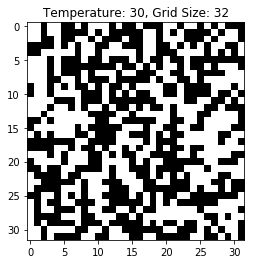

Temperature  10


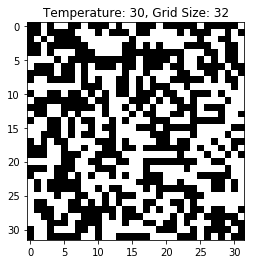

Temperature  5


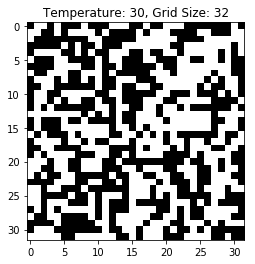

Temperature  2


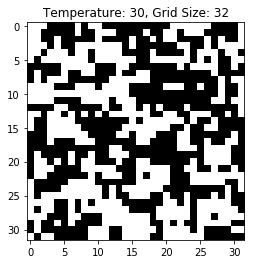

Temperature  1.5


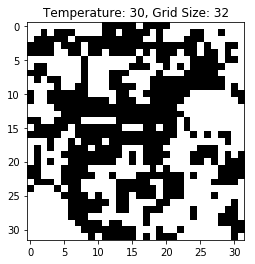

Temperature  1.0


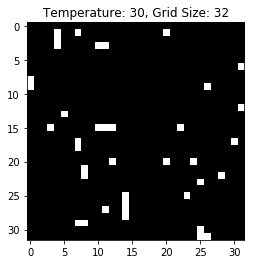

Temperature  0.5


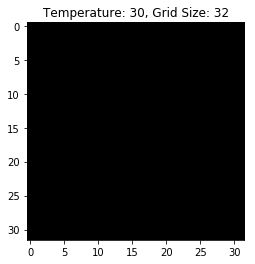

Temperature  0.1


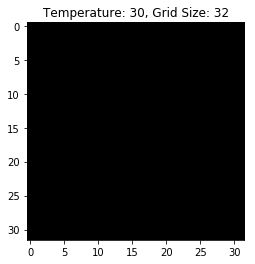

Temperature  0.01


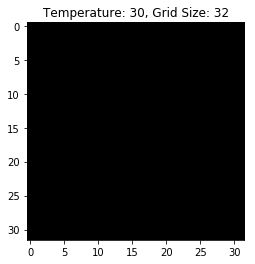

In [35]:
magnetization = []
Tmp = [30, 10, 5, 2, 1.5, 1., 0.5, 0.1, 0.01]
for T in Tmp:
    spins_init = 2 * (np.random.rand(L, L) > 0.5) - 1  # random initial state (table of {1, -1})
    print('Temperature ', T)
    spins = Ising(spins_init, Temp=T)
    magnetization.append(np.mean(spins))
    plt.figure()
    plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temperature: 30, Grid Size: %d" % (L))
    plt.show()

γ) Η μαγνήτηση που είναι η ποσότητα $m (\sigma) = \frac 1 {|\Lambda|} \sum_{\lambda \in \Lambda} \sigma(\lambda)$ εξαρτάται από το 1 / Τ. Αυτό συμβαίνει όπως περιγράψαμε στο β γιατί το σύστημα έχει χαμηλότερη ενθαλπία σε χαμηλές θερμοκρασίες, πράγμα που έχει ως αποτέλεσμα η $m(\sigma)$ να αυξάνεται (αφού υπάρχουν λιγότερα -1 απ'ότι +1 για να αναιρεθούν στον υπολογισμό του μ.ο.). Όταν δε η Τ είναι υψηλή τα φερμιόνια αλλάζουν ευκολότερα σπιν άρα η μαγνήτηση τείνει να είναι μηδενική. 

Text(0,0.5,'Magnetization')

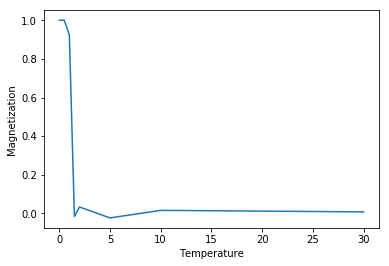

In [36]:
Tmp = [30, 10, 5, 2, 1.5, 1., 0.5, 0.1, 0.01]
plt.figure()
plt.plot(Tmp, magnetization)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

δ) Παρατηρούμε ότι όσο το nsteps αυξάνεται η αλυσίδα τείνει περισσότερο στην αλλαγή σπιν καθώς για να αλλάξει ένα φερμιόνιο σπιν απαιτούνται κατά μέσο όρο $\bar N = e^{\beta (DH)^+}$ βήματα πράγμα το οποίο απωτυπώνεται και στα plots. 

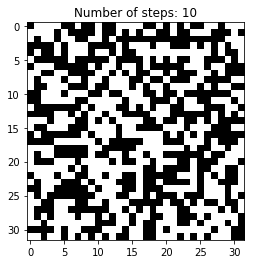

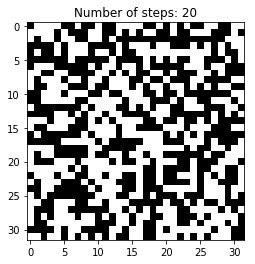

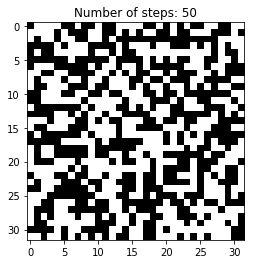

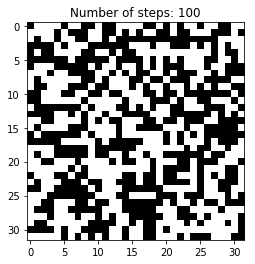

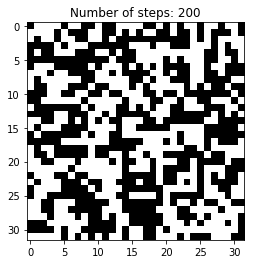

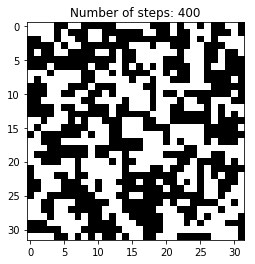

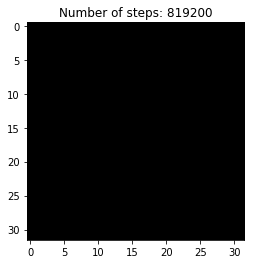

In [10]:
L = 32

spins_init = 2 * (np.random.rand(L, L) > 0.5) - 1  # random initial state (table of {1, -1})
spins = Ising(spins_init, Temp=0.1, nsteps= 800 * L * L + 100, previews=[10,20,50,100,200,400,800 * L * L])

## Αναφορές 

[1] Λουλάκης Μ., Στοχαστικές Διαδικασίες, Αποθετήριο Κάλιππος.  